### Timeseries manipulating

In [ ]:
# Import pandas
import pandas as pd

# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates )

# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds,how='inner')

### Correlation between Timeseries

In [ ]:
# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()  ## This step is important

# Compute correlation using corr()
correlation = returns['SP500'].corr(returns['US10Y'])
print("Correlation of stocks and interest rates: ", correlation)

# Make scatter plot
plt.scatter(returns['SP500'],returns['US10Y'])
plt.show()

### Spurious correlation

In [ ]:
# Compute correlation of levels
correlation1 = levels.DJI.corr(levels.UFO)
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes.DJI.corr(changes.UFO)
print("Correlation of changes: ", correlation2)

### Simple linear regression of timeseries
* OLS fit between X and Y
* Find the regression line
* R squared: how the linear regression line fits the dat

### Check if sqrt(R$^{2}$) and Corr are the same

In [ ]:
# Import the statsmodels module
import statsmodels.api as sm

# Compute correlation of x and y
correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))

# Convert the Series x to a DataFrame and name the column x
x = pd.DataFrame(x, columns=['x'])

# Add a constant to the DataFrame x
x = sm.add_constant(x)

# Fit the regression of y on x
result = sm.OLS(y,x).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

### Auto-correlation (autocorrelation of a single timeseries of the lag/lead version of itself)
* For financial timeseries: (1) mean reversion (2) trend following / momentum

In [ ]:
# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='W', how='last')

# Compute the percentage change of prices
returns = MSFT.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

#### Are Interest Rates Autocorrelated?
And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.

In [ ]:
# Compute the daily change in interest rates 
daily_data['change_rates'] = daily_data.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_data['change_rates'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
annual_data = daily_data['US10Y'].resample(rule='A', how='last')

# Repeat above for annual data
annual_data['diff_rates'] = annual_data.diff()
autocorrelation_annual = annual_data['diff_rates'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_annual))

### Sample Autocorrelation function
* Autocorr of all lag
* Significant auto correlation can be used to forecast
* For model selection

In [ ]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
plot_acf(HRB,alpha=1)
plt.show()

### IF the autocorr of MSFT is significant

In [ ]:
# Import the plot_acf module from statsmodels and sqrt from math
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags=20)
plt.show()

### White noises
* constant mean
* constant std
* zero auto-correlation at all lags

In [ ]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Simulate wite noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

### Random Walk
* today's price is yesterdays' price add some noise(this part is random)
* You can forecast a random walk process
* best guess of tomorrow is today's price
* Stock price is like a random walk with a drift ($\mu$)
* Dickey-Fuller test

Whereas stock returns are often modelled as white noise, stock prices closely follow a random walk. In other words, today's price is yesterday's price plus some random noise.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

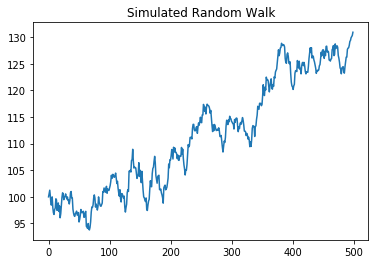

In [3]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

### Get the drift
* Many time series, like stock prices, are random walks but tend to drift up over time.
* Now you will make the noise multiplicative: you will add one to the random, normal changes to get a total return, and multiply that by the last price.

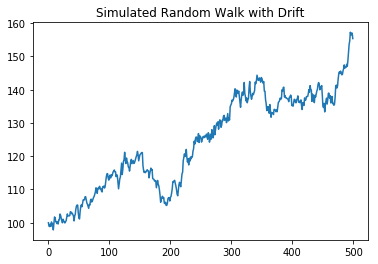

In [4]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

### "Augmented Dickey-Fuller Test" from the statsmodels library to show that it does indeed follow a random walk.

In [ ]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(AMZN['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

#### If the Stock return is the random walk

In [ ]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

## Stationarity
* Strong: the distribution is time-invariant
* Weak: mean, std, autocorrelation are time-invariant

For non-stationary data
* difficult to model
* Seasonal series is not stationary
* If there is trend, is non stationary

Do transformation to make data stationary first

#### Seasonal adjustment

In [ ]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

# Drop the NaN data in the first three three rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()

### Autoregressive Model (AR model)